<a href="https://colab.research.google.com/github/ekalmes/Portfolio/blob/main/Regression_Predicting_Ames_Housing_with_SLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Ames Housing Prices with SLR
Author: Zeke Kalmes and Brad Sheese

## Summary:
In previous exercises we introduced regression modelling and visualization using Boston housing data. In this notebook, we practice using these tools to examine housing prices in Ames Iowa.

## Data Source:
http://jse.amstat.org/v19n3/decock/AmesHousing.txt


## Description of Data:

The original publications: 
http://jse.amstat.org/v19n3/decock.pdf



In [ ]:
#@title Getting started? Execute this cell first.
#@markdown Click on the arrow to the left to execute this cell.

# set exercise name here
exercise_name = '11.3.9.1 Regression Ames Housing'

import os
import sys
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tool_path = '/content/cs125_tools/'

if not os.path.exists(tool_path):
  ! git clone --quiet https://github.com/bsheese/cs125_tools.git

if tool_path not in sys.path:
  sys.path.append(tool_path)

import exercise_report_response

exercise_report_response.exercise_time_difficulty_report(exercise_name)


# exercise specific code

# you must run this once each session to get access to the data

# temp fix for scatter
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Time
30 min or less,0%
31-60 min,0%
61-90 min,50%
91-120 min,50%
More than 2 hours,0%


,Difficulty
Very Easy,0%
Somewhat Easy,50%
Neutral,0%
Somewhat Difficult,0%
Very Difficult,50%


In [ ]:
#creating the dataframe
df = pd.read_csv('https://raw.githubusercontent.com/bsheese/CSDS125ExampleData/master/data_housing_ames.txt',
                 sep='\t')

# excluding outliers per author's recommendation
df = df[df['Gr Liv Area'] < 4000]

df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,...,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,...,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,...,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,...,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,...,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## Your Turn
Use the tools you've been shown to develop a model to predict housing prices in Ames. A good notebook will document each step of the process and provide text descriptions that interpret results.

You analysis should use simple lingear regression models to predict the outcome `SalePrice`. Your code should generate output should output visualizations and regression coefficients for each predictor. Finally, your code should output a single table that rank orders the predictors according to the magnitude of their association with the outcome. 

# Introduction
This notebook will use simple linear regression in order to predict the sale price of a home in Ames, Iowa. The process will include finding correlations, betas, intercepts, and r-squared values among other statistical metrics. This notebook will employ the pandas, seaborn, numpy and SciKit-Learn libraries of python. 

# Imports
Here we import the libraries mentioned above. 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Examining Correlations
A simple sorted correlation table will give us a rough estimate of which features to examine further in our regression model. 

In [ ]:
df_corr = df.corr()
df_corr_abs = df_corr.abs()
df_corr_abs_sorted = df_corr_abs.sort_values(by = 'SalePrice', ascending = False)
df_corr_abs_sorted.head(20)

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
SalePrice,0.033754,0.246186,0.086906,0.360431,0.270047,0.805236,0.103296,0.565110,0.540290,0.513221,0.444482,0.007438,0.185175,0.658649,0.642902,0.257132,0.037836,0.719463,0.281229,0.045745,0.544486,0.284458,0.139766,0.120938,0.498477,0.474878,0.533992,0.652546,0.648322,0.326911,0.322075,0.129339,0.033305,0.115556,0.035491,0.019183,0.039840,0.028112,1.000000
Overall Qual,0.051160,0.266174,0.040287,0.196015,0.083256,1.000000,0.093902,0.596621,0.569498,0.421382,0.268857,0.040162,0.269999,0.545382,0.470625,0.234033,0.048521,0.564797,0.164173,0.048754,0.518713,0.265096,0.061772,0.159819,0.371467,0.387174,0.570236,0.598124,0.558773,0.250281,0.289399,0.139566,0.018852,0.043252,0.003457,0.027559,0.032102,0.018725,0.805236
Gr Liv Area,0.015315,0.115892,0.072477,0.347715,0.258529,0.564797,0.116169,0.239305,0.318860,0.380551,0.149968,0.015397,0.240402,0.400774,0.529858,0.662213,0.102163,1.000000,0.046466,0.061000,0.637511,0.437553,0.534222,0.125043,0.809118,0.449018,0.272529,0.494262,0.475897,0.241446,0.319405,0.008413,0.007956,0.093677,0.075341,0.005921,0.047685,0.022720,0.719463
Total Bsmt SF,0.035252,0.205913,0.227444,0.309304,0.219454,0.545382,0.176852,0.414462,0.300061,0.373364,0.495466,0.097541,0.426653,1.000000,0.783960,0.233201,0.023241,0.400774,0.324435,0.002169,0.325536,0.071906,0.053726,0.038306,0.254302,0.322169,0.352580,0.446127,0.476211,0.221090,0.214617,0.085195,0.040827,0.082135,0.004071,0.011691,0.020322,0.007223,0.658649
Garage Cars,0.037600,0.238277,0.045594,0.310070,0.176104,0.598124,0.181245,0.536607,0.424500,0.358264,0.254961,0.013812,0.178618,0.446127,0.445069,0.178151,0.067215,0.494262,0.161023,0.037707,0.475957,0.231282,0.090521,0.036678,0.352363,0.318991,0.586172,1.000000,0.892064,0.238287,0.200230,0.132262,0.023628,0.043757,0.022167,0.040143,0.049596,0.021217,0.652546
Garage Area,0.037618,0.214430,0.103181,0.344023,0.198811,0.558773,0.153100,0.478958,0.374855,0.364126,0.291713,0.004629,0.163713,0.476211,0.482157,0.122868,0.053422,0.475897,0.179578,0.027356,0.404988,0.174330,0.073351,0.057255,0.317035,0.286387,0.554944,0.892064,1.000000,0.233166,0.221332,0.105416,0.030105,0.064104,0.026788,0.028583,0.041305,0.011624,0.648322
1st Flr SF,0.019245,0.154458,0.255465,0.428571,0.305667,0.470625,0.159138,0.311505,0.241169,0.370785,0.414219,0.091374,0.303038,0.783960,1.000000,0.277978,0.012116,0.529858,0.257503,0.005264,0.372409,0.122132,0.110781,0.081442,0.368994,0.399419,0.259601,0.445069,0.482157,0.216468,0.206023,0.064541,0.047014,0.105512,0.071908,0.011357,0.042854,0.010136,0.642902
Year Built,0.053282,0.344752,0.036899,0.115743,0.017049,0.596621,0.368533,1.000000,0.611444,0.312047,0.279984,0.026924,0.128407,0.414462,0.311505,0.013487,0.144242,0.239305,0.210306,0.033119,0.468485,0.267691,0.055650,0.137621,0.107042,0.167803,0.834548,0.536607,0.478958,0.226964,0.194889,0.374127,0.016001,0.040974,0.008231,0.027978,0.014688,0.012466,0.565110
Full Bath,0.046784,0.171924,0.135201,0.177558,0.121394,0.518713,0.214322,0.468485,0.456708,0.254758,0.066741,0.075724,0.274490,0.325536,0.372409,0.398892,0.002292,0.637511,0.025045,0.050662,1.000000,0.156520,0.358727,0.172476,0.527021,0.225748,0.493786,0.475957,0.404988,0.176242,0.255411,0.117091,0.015822,0.014272,0.011896,0.021145,0.046647,0.003051,0.544486
Year Remod/Add,0.076466,0.158223,0.043722,0.086029,0.015887,0.569498,0.048356,0.611444,1.000000,0.194059,0.147447,0.061725,0.164283,0.300061,0.241169,0.157391,0.060256,0.318860,0.132701,0.048560,0.456708,0.210293,0.021801,0.142199,0.194164,0.130699,0.651731,0.424500,0.374

If we scroll all the way to the right, we can see that the most correlated feature is Overall Qual. Correlations closest to 1 are usually the features that are most closely related with the outcome. These correlations can be used to roughly estimate which feature will become the best predictor come time for linear regression. 

It may be easier to see these correlations visibly, so this next step will graph scatterplots for the outcome (SalePrice) vs. all of the features. 

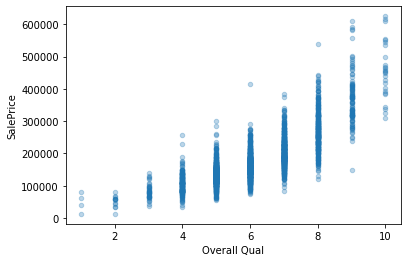

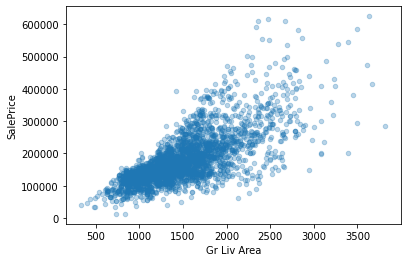

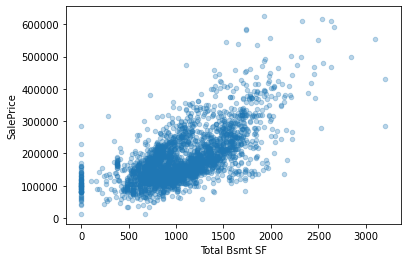

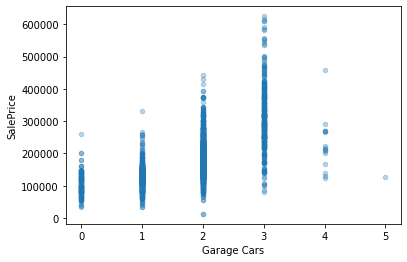

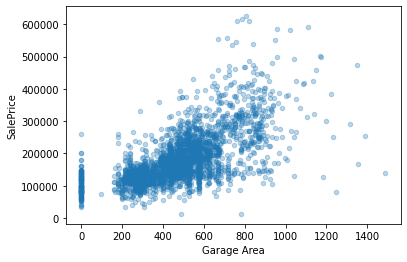

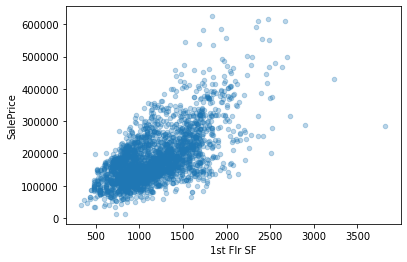

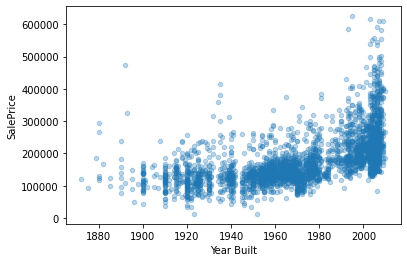

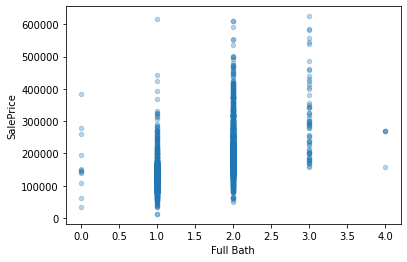

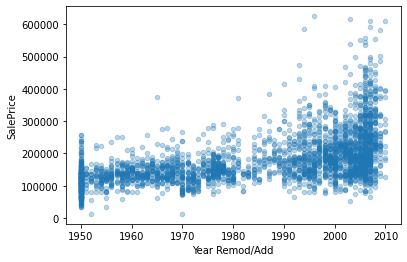

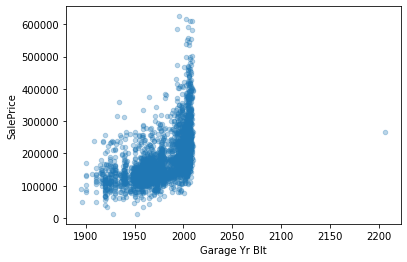

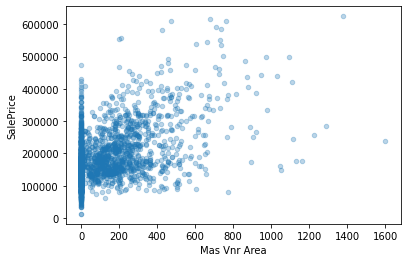

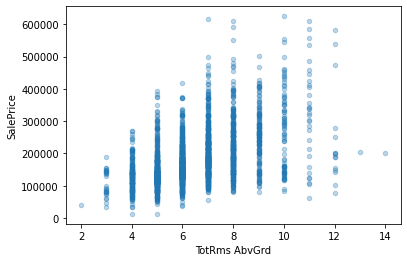

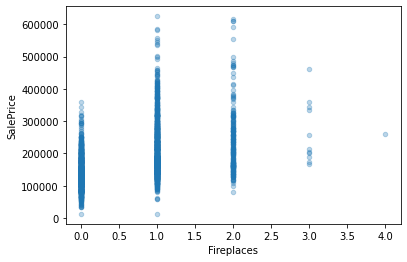

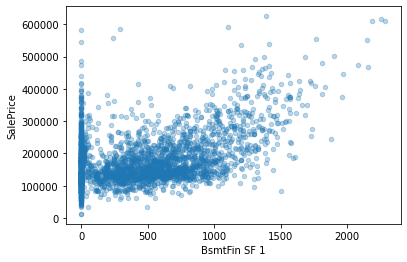

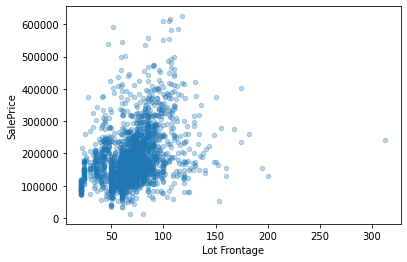

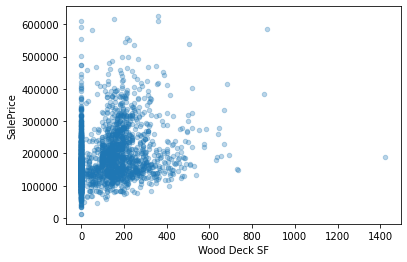

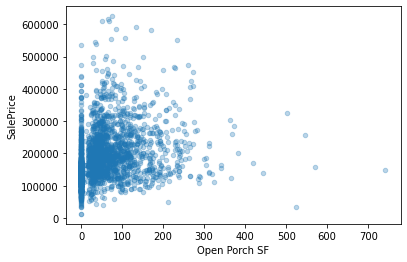

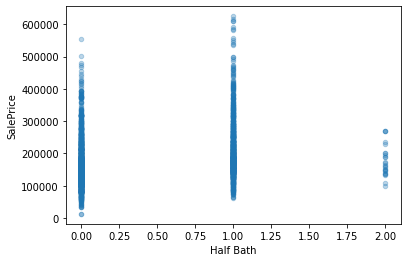

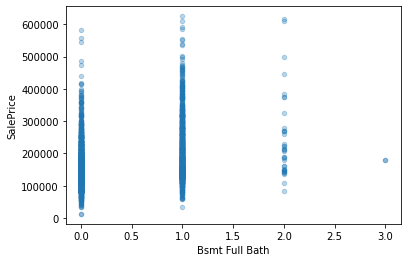

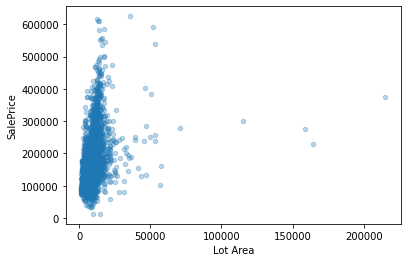

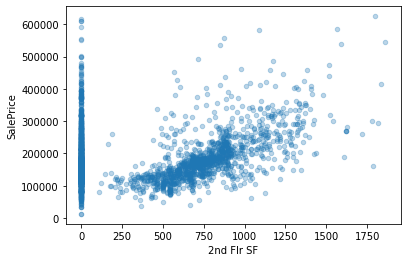

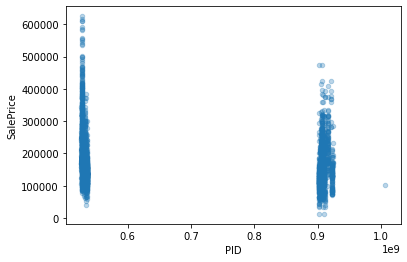

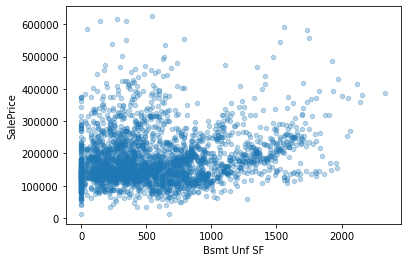

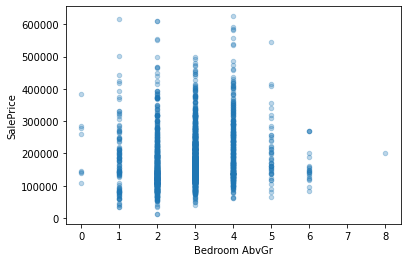

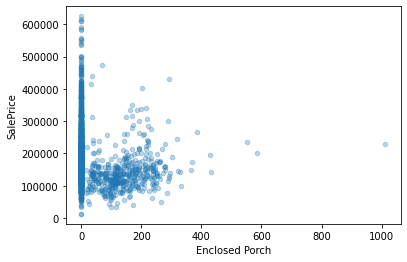

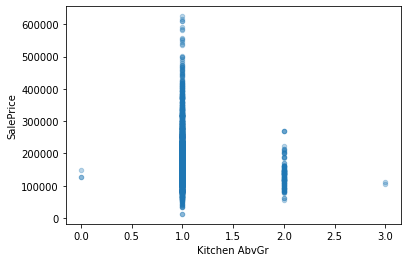

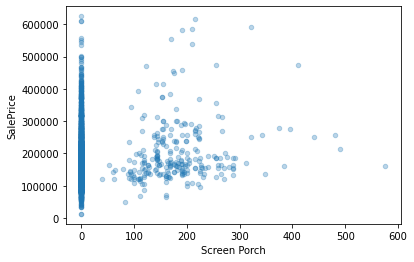

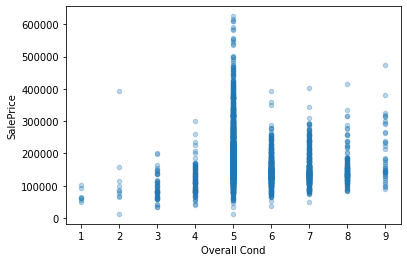

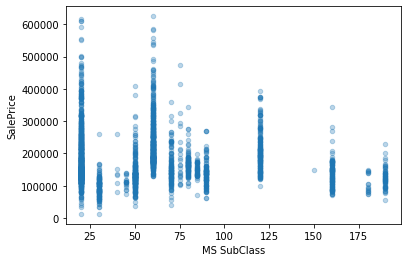

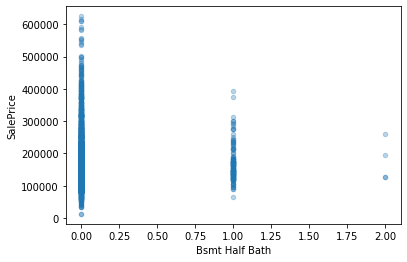

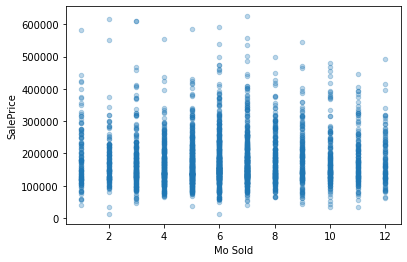

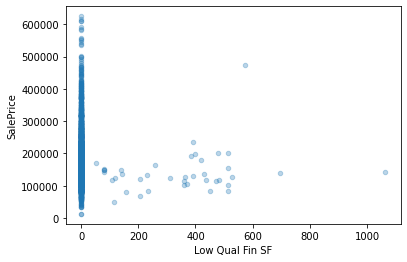

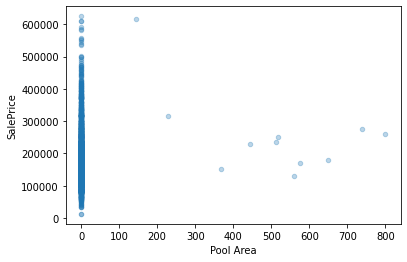

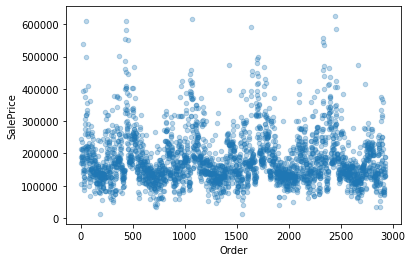

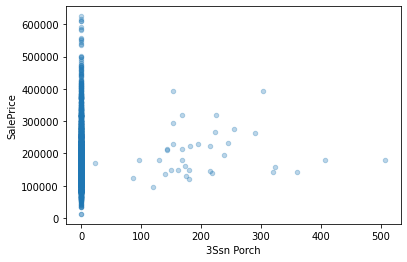

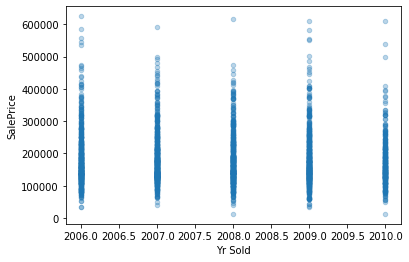

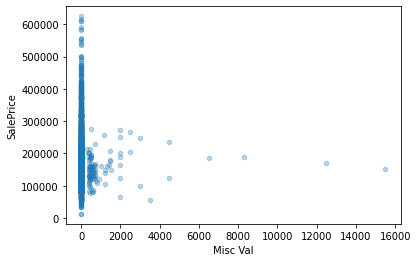

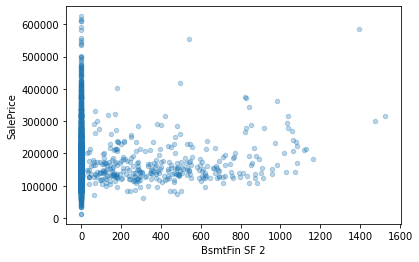

In [ ]:
for predictor in df.corr()['SalePrice'].abs().sort_values(ascending=False).index[1:]:
  # takes each individual metric and plots it against SalePrice to show each 
  # individual correlation
  df.plot.scatter(predictor, 'SalePrice', alpha =0.3)
  plt.show()

# Data Maniputlation
We will first start by examining the database itself.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2925 non-null   int64  
 1   PID              2925 non-null   int64  
 2   MS SubClass      2925 non-null   int64  
 3   MS Zoning        2925 non-null   object 
 4   Lot Frontage     2435 non-null   float64
 5   Lot Area         2925 non-null   int64  
 6   Street           2925 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2925 non-null   object 
 9   Land Contour     2925 non-null   object 
 10  Utilities        2925 non-null   object 
 11  Lot Config       2925 non-null   object 
 12  Land Slope       2925 non-null   object 
 13  Neighborhood     2925 non-null   object 
 14  Condition 1      2925 non-null   object 
 15  Condition 2      2925 non-null   object 
 16  Bldg Type        2925 non-null   object 
 17  House Style   

We can see that there are multiple coulmns that have a significant amount of NAs, so we will drop all of these columns. 

In [ ]:
df_dropped = df.drop(columns=['Alley', 'Pool QC', 'Fence', 'Misc Feature', 'Fireplace Qu'])
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2925 non-null   int64  
 1   PID              2925 non-null   int64  
 2   MS SubClass      2925 non-null   int64  
 3   MS Zoning        2925 non-null   object 
 4   Lot Frontage     2435 non-null   float64
 5   Lot Area         2925 non-null   int64  
 6   Street           2925 non-null   object 
 7   Lot Shape        2925 non-null   object 
 8   Land Contour     2925 non-null   object 
 9   Utilities        2925 non-null   object 
 10  Lot Config       2925 non-null   object 
 11  Land Slope       2925 non-null   object 
 12  Neighborhood     2925 non-null   object 
 13  Condition 1      2925 non-null   object 
 14  Condition 2      2925 non-null   object 
 15  Bldg Type        2925 non-null   object 
 16  House Style      2925 non-null   object 
 17  Overall Qual  

Now we can see that there are no columns with a significant number of nulls. 

We can also see that some of the features have the datatype object, which means they are a form of catergorical data. We cannot perform linear regression on categorical data, so we will drop these columns. 

In [ ]:
df_dropped_categories = df_dropped.select_dtypes(exclude = ['object'])
df_dropped_categories.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2925 non-null   int64  
 1   PID              2925 non-null   int64  
 2   MS SubClass      2925 non-null   int64  
 3   Lot Frontage     2435 non-null   float64
 4   Lot Area         2925 non-null   int64  
 5   Overall Qual     2925 non-null   int64  
 6   Overall Cond     2925 non-null   int64  
 7   Year Built       2925 non-null   int64  
 8   Year Remod/Add   2925 non-null   int64  
 9   Mas Vnr Area     2902 non-null   float64
 10  BsmtFin SF 1     2924 non-null   float64
 11  BsmtFin SF 2     2924 non-null   float64
 12  Bsmt Unf SF      2924 non-null   float64
 13  Total Bsmt SF    2924 non-null   float64
 14  1st Flr SF       2925 non-null   int64  
 15  2nd Flr SF       2925 non-null   int64  
 16  Low Qual Fin SF  2925 non-null   int64  
 17  Gr Liv Area   

As we can see, we have dropped all features that are categorical. Now we will drop all rows with a null value in order to have an equal number of non-null rows.

In [ ]:
df_dropped_na = df_dropped_categories.dropna()
df_dropped_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2269 entries, 0 to 2929
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2269 non-null   int64  
 1   PID              2269 non-null   int64  
 2   MS SubClass      2269 non-null   int64  
 3   Lot Frontage     2269 non-null   float64
 4   Lot Area         2269 non-null   int64  
 5   Overall Qual     2269 non-null   int64  
 6   Overall Cond     2269 non-null   int64  
 7   Year Built       2269 non-null   int64  
 8   Year Remod/Add   2269 non-null   int64  
 9   Mas Vnr Area     2269 non-null   float64
 10  BsmtFin SF 1     2269 non-null   float64
 11  BsmtFin SF 2     2269 non-null   float64
 12  Bsmt Unf SF      2269 non-null   float64
 13  Total Bsmt SF    2269 non-null   float64
 14  1st Flr SF       2269 non-null   int64  
 15  2nd Flr SF       2269 non-null   int64  
 16  Low Qual Fin SF  2269 non-null   int64  
 17  Gr Liv Area   

We can now see that there are an equal number of non-null rows for each feature. 

# Simple Linear Regression
Within this step, we will set up our model, calculate regression metrics to see which feature is the best predictor, and use this feature to predict the Sale Price of homes in Ames, Iowa. 

We will start by producing a regression report of our features that contains the intercept, beta coefficient, as well the the r-squared values. 

This first step creates a LinearRegression object that will take our features as X values and our outcome as the y value. 

In [ ]:
saleprice_regression = LinearRegression(normalize=True)

This next step takes the SalePrice series and turns it into an array, as the LinearRegression object only accepts arrays as input. This array is set equal to the outcome variable, y. 

In [ ]:
y = df_dropped_na['SalePrice'].values.reshape(len(df_dropped_na['SalePrice']), 1)

This final step loops through the features (except SalePrice), turns the series of the currently iterated series into an array and sets that equal to the feature variable (X), passes the X and y values into the .fit() class of the LinearRegression onject, and then prints the regression metrics using the .coef_, .intercept_ and .score() classes. 

In [ ]:
for predictor in df_dropped_na[df_dropped_na.columns[:38]]:
  X = df_dropped_na[predictor].values.reshape(len(df_dropped_na[predictor]), 1)
  saleprice_regression.fit(X,y)
  print(predictor)
  print('\t', 'intercept = ', round(saleprice_regression.coef_.item(), 2))
  print('\t', 'coefficient = ', round(saleprice_regression.intercept_.item(), 2))
  print('\t', 'R squared = ', round(saleprice_regression.score(X, y), 2), '\n')

Order
	 intercept =  -4.4
	 coefficient =  190348.56
	 R squared =  0.0 

PID
	 intercept =  -0.0
	 coefficient =  261023.74
	 R squared =  0.06 

MS SubClass
	 intercept =  -158.55
	 coefficient =  192858.23
	 R squared =  0.01 

Lot Frontage
	 intercept =  1279.37
	 coefficient =  94942.41
	 R squared =  0.13 

Lot Area
	 intercept =  4.06
	 coefficient =  144233.29
	 R squared =  0.1 

Overall Qual
	 intercept =  46928.16
	 coefficient =  -105757.66
	 R squared =  0.66 

Overall Cond
	 intercept =  -12764.33
	 coefficient =  255061.04
	 R squared =  0.03 

Year Built
	 intercept =  1507.22
	 coefficient =  -2788227.79
	 R squared =  0.32 

Year Remod/Add
	 intercept =  2112.83
	 coefficient =  -4009753.39
	 R squared =  0.3 

Mas Vnr Area
	 intercept =  242.58
	 coefficient =  158720.62
	 R squared =  0.29 

BsmtFin SF 1
	 intercept =  83.02
	 coefficient =  147848.33
	 R squared =  0.2 

BsmtFin SF 2
	 intercept =  -7.46
	 coefficient =  184265.85
	 R squared =  0.0 

Bsmt Unf SF
	

Now we have a nicely formatted report that tells us the intercept, coefficient, and r squared value for each feature. 

If we look at the r-squared values for each feature, we can see that the highest value comes with Overall Quality at 0.66. This r squared value can be interpreted as the regression line for the scatterplot SalePrice vs Overall Qual accounts for ~66% of the variance in the data. The higher the r squared value, the closer all of the points are to the regression line. As a general rule, the feature with the highest r-squared value will be the best predictor. 

We also see that there are a lot of features that have r-squared values that are either 0.0 or a bit bigger but still miniscule. This shows that these features are not good predicors, as the regression line does not fit a single (or more than a miniscule) percent of the variance of the data. This leads us to believe that these features should not be used in a model of this type. 

In order to better understand these r-squared values, let's plot scatterplots of SalePrice vs the other features, and fit their regression lines to them. 

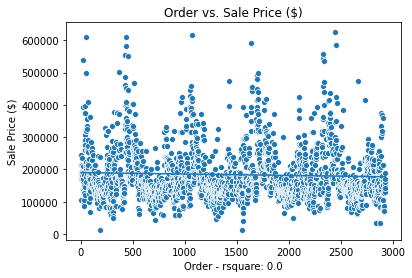

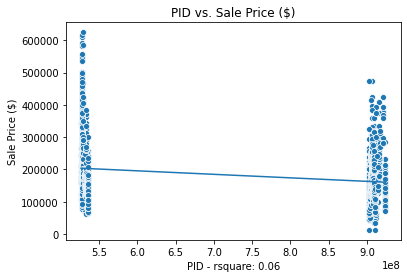

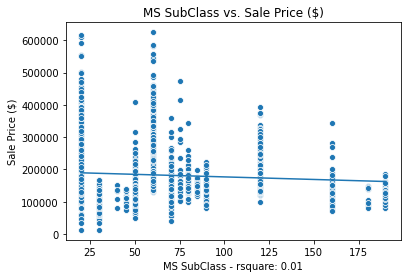

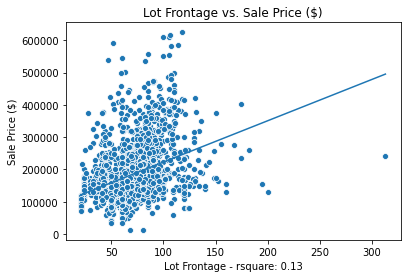

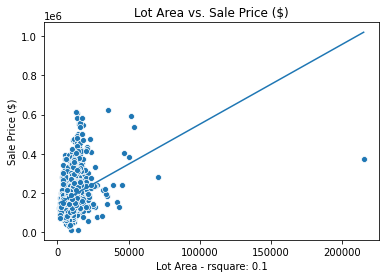

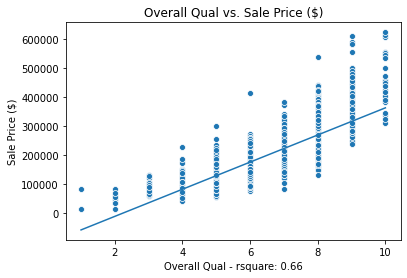

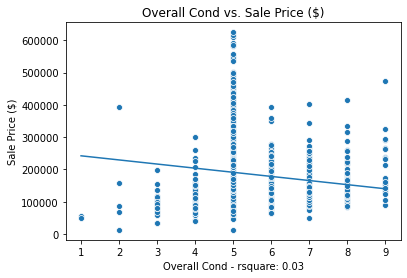

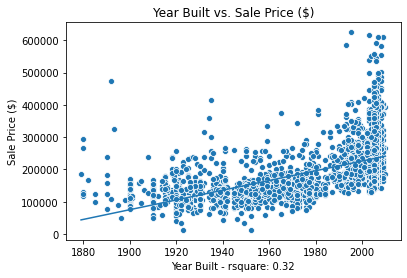

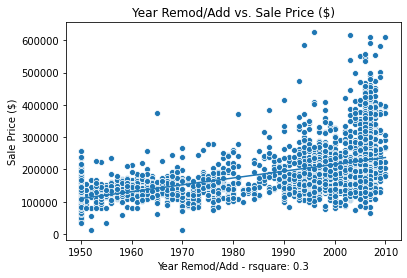

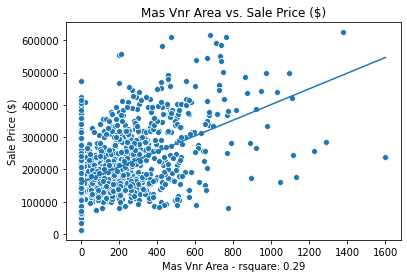

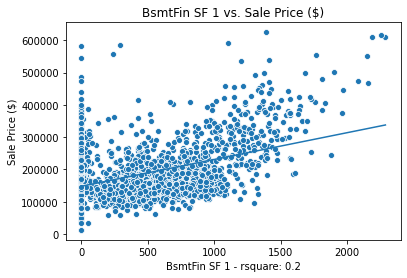

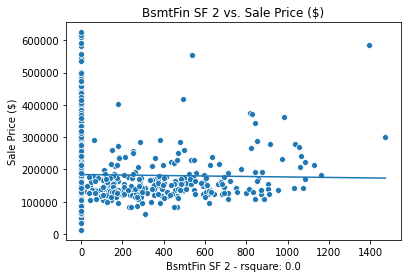

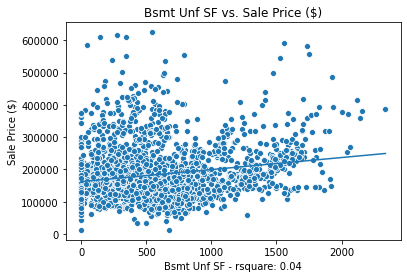

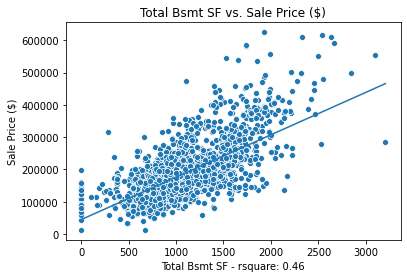

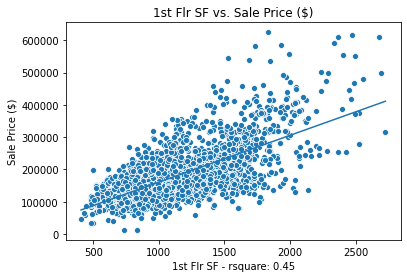

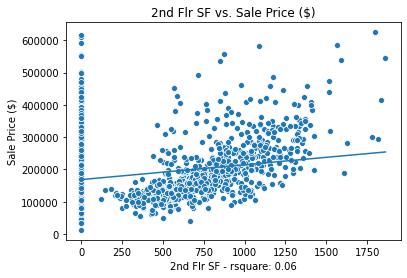

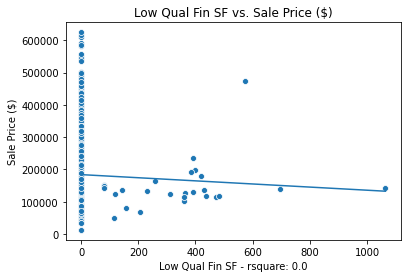

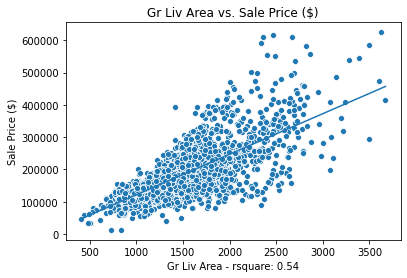

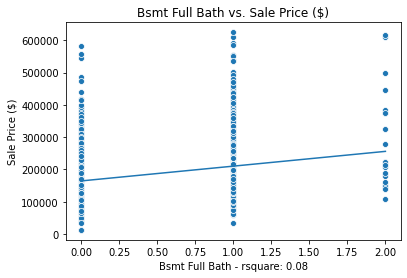

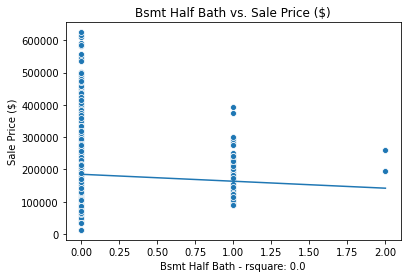

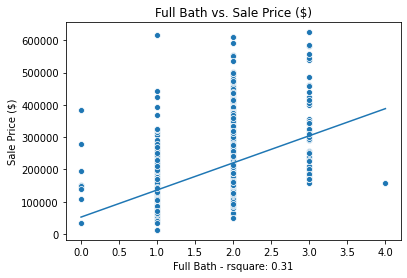

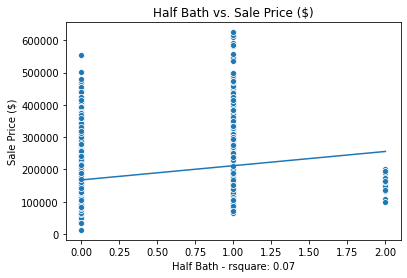

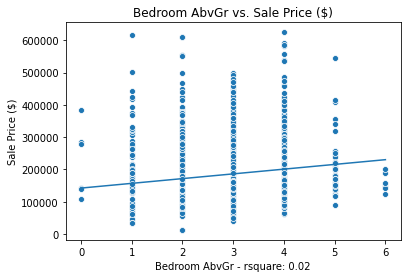

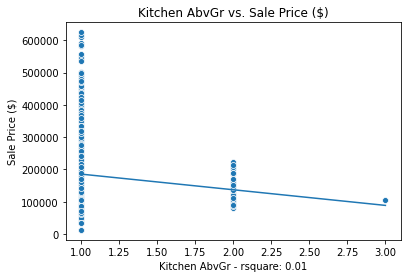

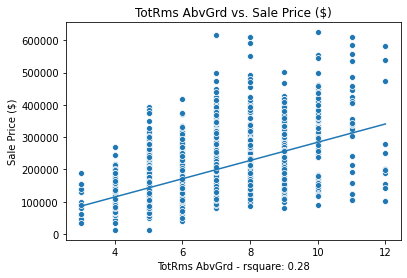

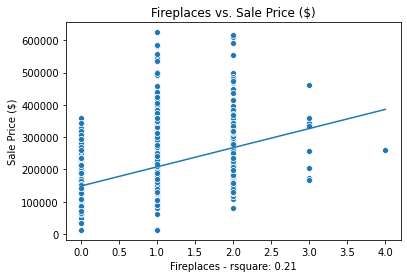

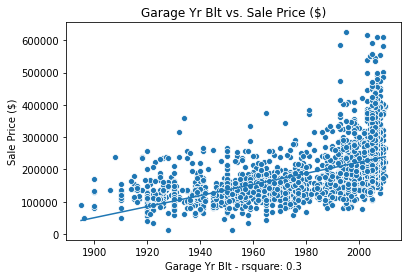

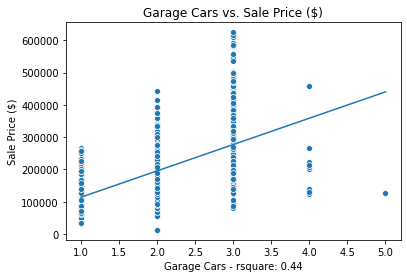

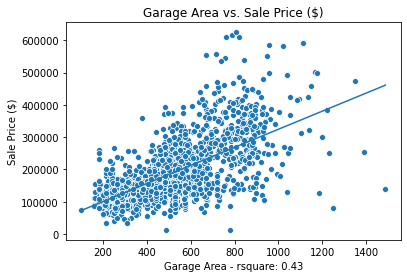

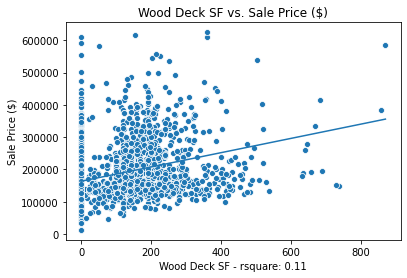

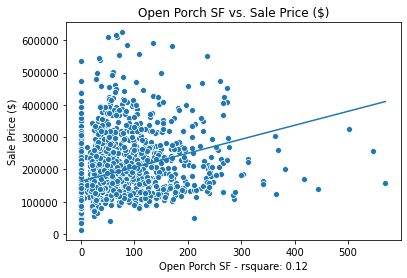

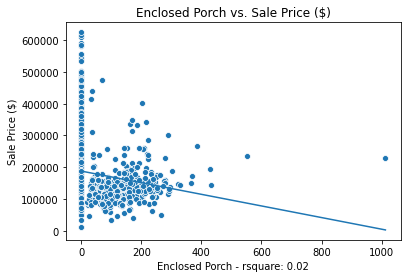

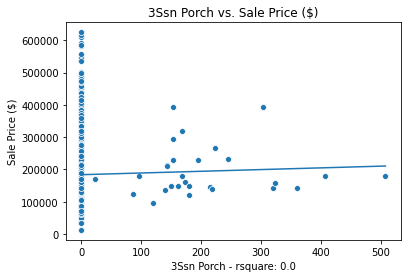

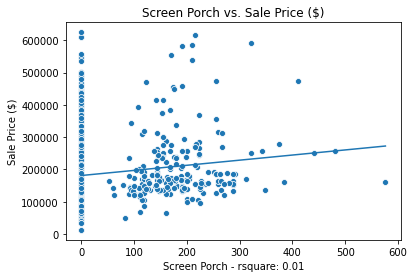

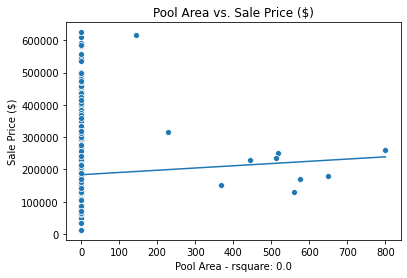

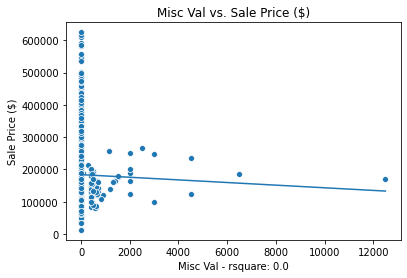

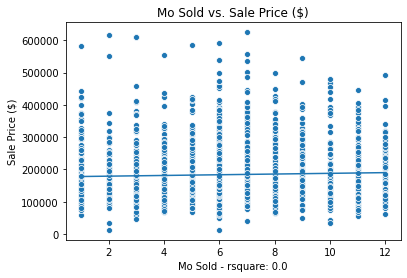

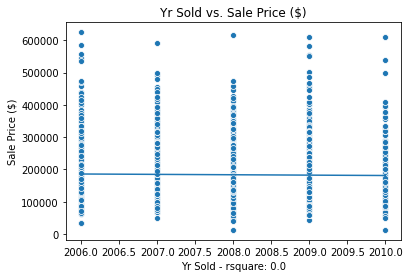

In [ ]:
y = df_dropped_na['SalePrice'].values.reshape(len(df_dropped_na['SalePrice']), 1)
for predictor in df_dropped_na[df_dropped_na.columns[:38]]:
  X = df_dropped_na[predictor].values.reshape(len(df_dropped_na[predictor]), 1)
  saleprice_regression.fit(X,y)
  
  #predicting y value using the currently iterated X value
  predicted_y = saleprice_regression.predict(X)

  #flattening arrays using .flatten() in order to plot them
  X_flat = X.flatten()
  y_flat = predicted_y.flatten()

  # get min and max of X
  X_min = X.min()
  X_max = X.max()

  # use the min and max to get the predictions
  predicted_y_min = saleprice_regression.predict([[X_min]]).item()
  predicted_y_max = saleprice_regression.predict([[X_max]]).item()

  # plot the line and the scatter
  sns.lineplot(x = [X_min, X_max], y = [predicted_y_min, predicted_y_max])
  sns.scatterplot(x = predictor, y = 'SalePrice', data = df_dropped_na)
  plt.xlabel(predictor + ' - rsquare: ' + str(round(saleprice_regression.score(X, y), 2)))
  plt.ylabel('Sale Price ($)')
  plt.title(predictor + ' vs. Sale Price ($)')
  plt.show()

We can see in these scatterplots why the r-squared values are the way they are. For features with low r-squared values, we see that they have a lot of outliers, and/or the data is quite far away from the line. Even for features that have relatively high r-squared values, we can notice some issues. For features with plots like '1st Flr SF' and 'Gr Liv Area', we see that the regression line fits well at the beginning, but there is the issue of the datapoints starting to fan out towards the end, which is a sign that there is more variance towards the upper end of homes. This means that the variance is not normally distributed along the regression line, and that a different model may need to be used. 

It would be helpful to have a ranked table of the r-squared values of each feature as to help decide which feature is the best predictor. This step will create such a table

In [ ]:
#create list of features for new df
features_list = df_dropped_na.columns[:38].tolist()

#create list of all r squared values 
r_squared_list = []
for predictor in df_dropped_na[df_dropped_na.columns[:38]]:
  X = df_dropped_na[predictor].values.reshape(len(df_dropped_na[predictor]), 1)
  saleprice_regression.fit(X,y)
  r_square = round(saleprice_regression.score(X, y),2)
  r_squared_list.append(r_square)

#create dictionary with r_square_list and rows_list
r_square_dict = {'features': features_list, 'r_squares': r_squared_list}

#create r square dataframe dictionary
df_r_squared = pd.DataFrame(data = r_square_dict)

#sort dataframe by r_squares, ascending false
df_r_squared_sorted = df_r_squared.sort_values(by = ['r_squares'], ascending = False, ignore_index = True)
df_r_squared_sorted.head(50)

,features,r_squares
0,Overall Qual,0.66
1,Gr Liv Area,0.54
2,Total Bsmt SF,0.46
3,1st Flr SF,0.45
4,Garage Cars,0.44
5,Garage Area,0.43
6,Year Built,0.32
7,Full Bath,0.31
8,Year Remod/Add,0.30
9,Garage Yr Blt,0.30


In [ ]:
#@title Completed the exercise? 
#@markdown Click on the arrow to the left to create the response form.
exercise_report_response.display_form(exercise_report_response.er_question_list)

Your first name:


Text(value='', placeholder='Enter your first name here')


Your last name:


Text(value='', placeholder='Enter your last name here')


How difficult was the exercise?


ToggleButtons(button_style='warning', index=2, options=('Very Easy', 'Somewhat Easy', 'Neutral', 'Somewhat Dif…


How long did it take you to complete the exercise?


ToggleButtons(button_style='warning', index=2, options=('30 min or less', '31-60 min', '61-90 min', '91-120 mi…


What tools (or concepts) used in this exercise do you feel confident with?


Textarea(value='', placeholder='Enter your response here')


What tools (or concepts) do you still need practice with?


Textarea(value='', placeholder='Enter your response here')


What suggestions do you have for improving the exercise?


Textarea(value='', placeholder='Enter your response here')


What corrections should be made (typos. etc)?


Textarea(value='', placeholder='Enter your response here')


Share your notebook.
Select 'Share' at the top of the screen. Then select 'Get Link'.
Change the Link so anyone can view it.
Click 'Copy Link', then 'Done'. Paste the link here.


Textarea(value='', placeholder='Enter your response here')

In [ ]:
#@title Ready to Submit?
#@markdown If you have completed the exercise and the exercise response:
#@markdown * check the box 'Ready' box below 
#@markdown * execute this cell

Ready = True #@param {type:"boolean"}

try:
  if Ready == True:
    exercise_report_response.submit_exercise_response(exercise_name, exercise_report_response.er_question_list)

  else:
    print('NOT SUBMITTED!!!')
    print('Check the ready box if you are ready to submit your response.')

except:
  print('NOT SUBMITTED!!!')
  print('Execute the cell above to create the form.')

Exercise response submitted.
